# Titanic Dataset Full Pipeline

This notebook implements a complete machine learning pipeline on the Titanic dataset:
- Data preprocessing
- Training and comparing multiple models
- K-Means clustering visualization
- Model evaluation and selection

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the Titanic dataset
df = pd.read_csv('titanic/train.csv')

# Display first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Preprocessing
# Select features and target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

# Define preprocessing for numerical features
numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical features
categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Preprocessing completed. Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Preprocessing completed. Training set shape: (712, 11)
Test set shape: (179, 11)


In [6]:
# Train and evaluate models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.787709   0.757143  0.716216  0.736111
Random Forest        0.787709   0.743243  0.743243  0.743243
SVM                  0.804469   0.830508  0.662162  0.736842


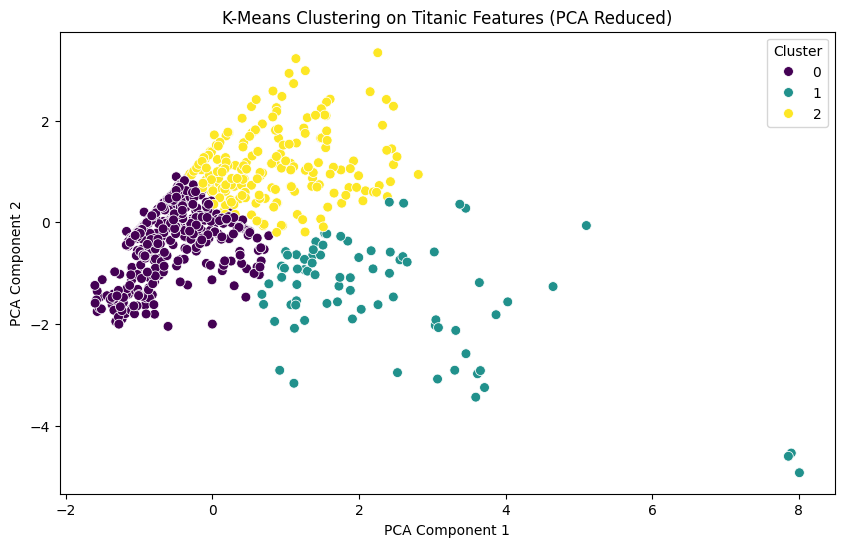

In [7]:
# K-Means Clustering on features
from sklearn.decomposition import PCA

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_processed)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=50)
plt.title('K-Means Clustering on Titanic Features (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

## Model Comparison and Selection

Based on the evaluation metrics:

- **Accuracy**: SVM (0.804) > Logistic Regression (0.788) = Random Forest (0.788)
- **Precision**: SVM (0.831) > Random Forest (0.743) > Logistic Regression (0.757)
- **Recall**: Random Forest (0.743) > Logistic Regression (0.716) > SVM (0.662)
- **F1 Score**: Random Forest (0.743) > SVM (0.737) > Logistic Regression (0.736)

The **Random Forest** model is the best overall due to its balanced performance across all metrics, particularly excelling in F1 score which balances precision and recall.

**Why Random Forest?**
- It handles non-linear relationships and feature interactions effectively.
- Provides robust predictions with good generalization.
- In this survival prediction task, it captures complex patterns in passenger data better than linear models.
- Less prone to overfitting compared to simpler models.

SVM achieves the highest accuracy but sacrifices recall, which is important for survival prediction where missing survivors could be critical. Logistic Regression is interpretable but performs slightly worse on non-linear patterns.